In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.DataFrame([[0,0,0],[0.2,0.1,0], [1,0,0], [2,1,1],[2.5,0.9,1], [3,1,1]], columns = ['x','y', 'target'])

In [3]:
X = data.drop(['target'], axis=1)
Y = data['target']


In [4]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)


KNeighborsClassifier(n_neighbors=3)

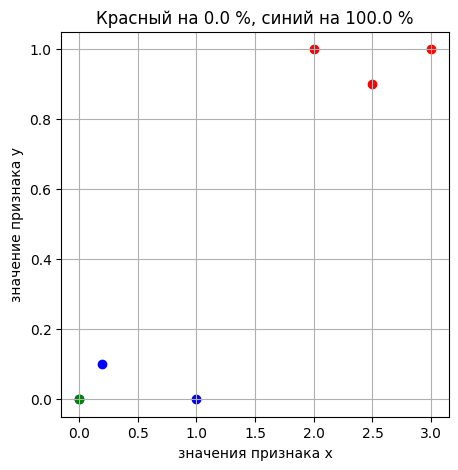

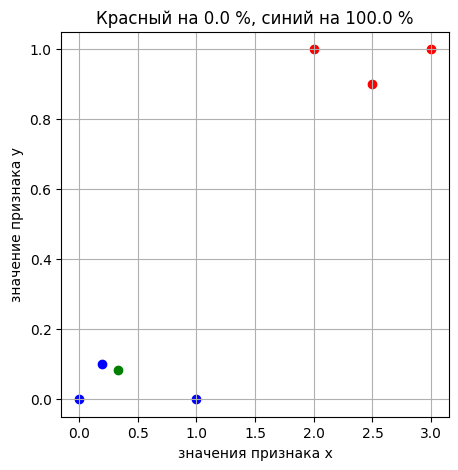

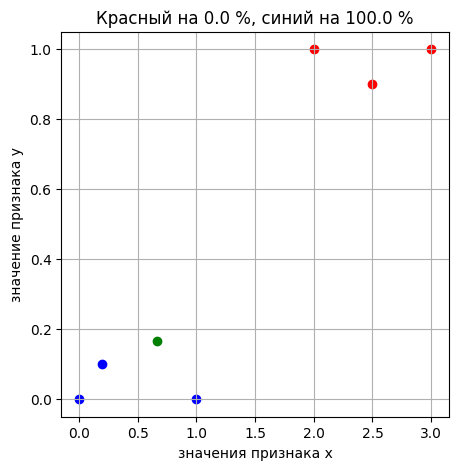

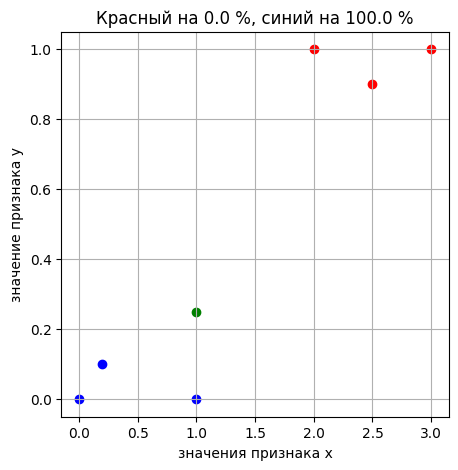

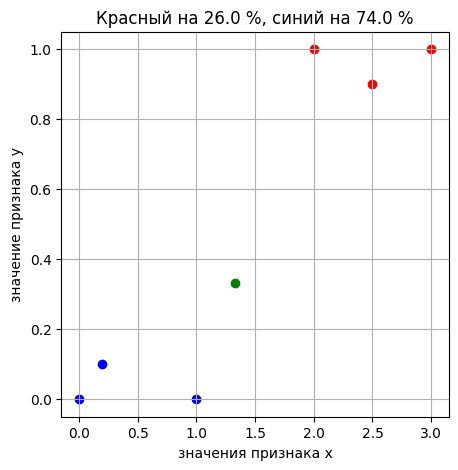

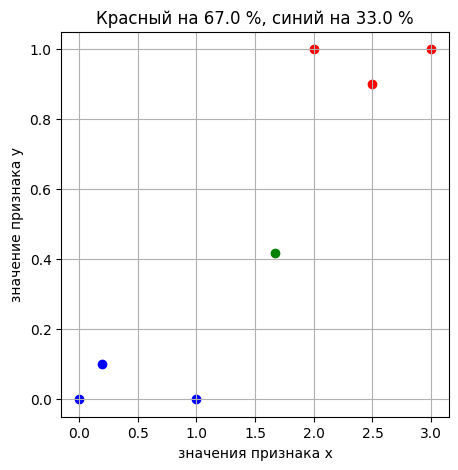

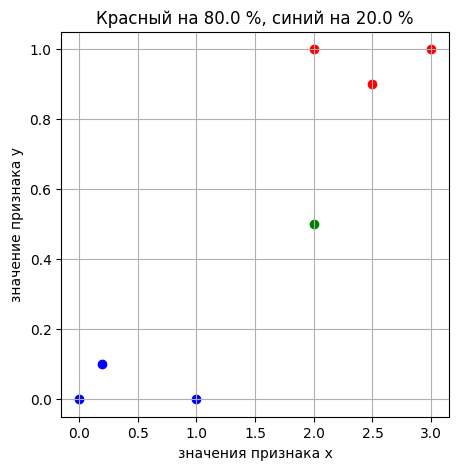

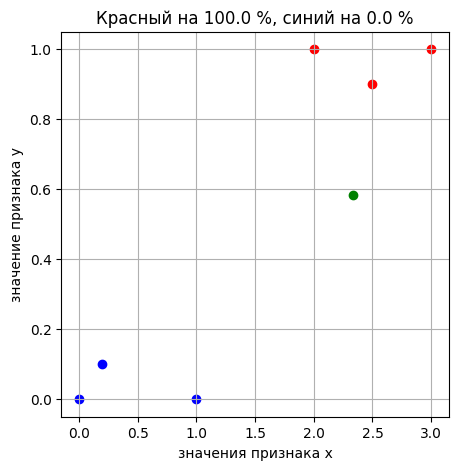

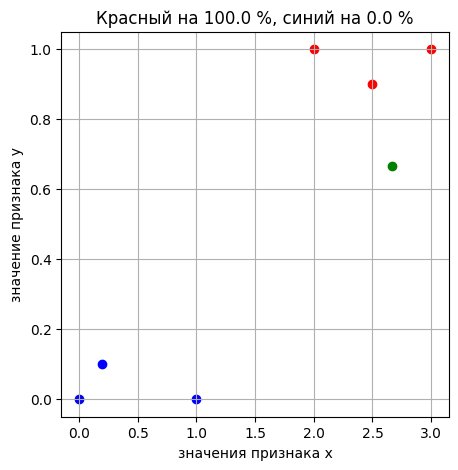

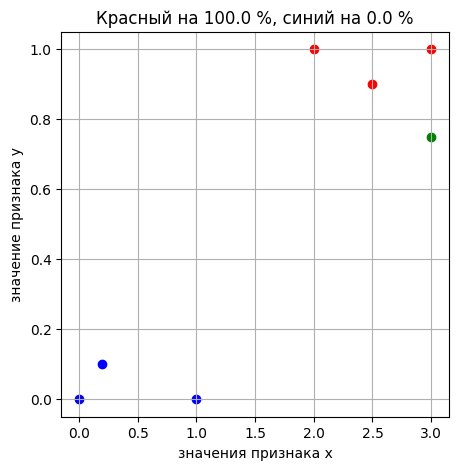

In [7]:
def plot_neighbors():
    for item in np.linspace(0,3,10):
        x = item
        y = item*0.25
        plt.figure(figsize = (5,5))
        red = data[data.target == 1]
        blue = data[data.target == 0]
        red_prob = round(neigh.predict_proba([[x,y]])[0][1],2)*100 #вероятность принадлежности к красным
        blue_prob = round(neigh.predict_proba([[x,y]])[0][0],2)*100 #вероятность принадлежности к синим
        plt.title(f'Красный на {red_prob} %, синий на {blue_prob} %')
        plt.xlabel('значения признака x')
        plt.ylabel('значение признака y')
        plt.scatter(red.x.values,red.y.values ,c= 'r')
        plt.scatter(blue.x.values,blue.y.values ,c= 'b')
        plt.scatter(x,y ,c= 'g')
        plt.grid()
        plt.show()

plot_neighbors()

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh.fit(X, Y)


KNeighborsClassifier(n_neighbors=3, weights='distance')

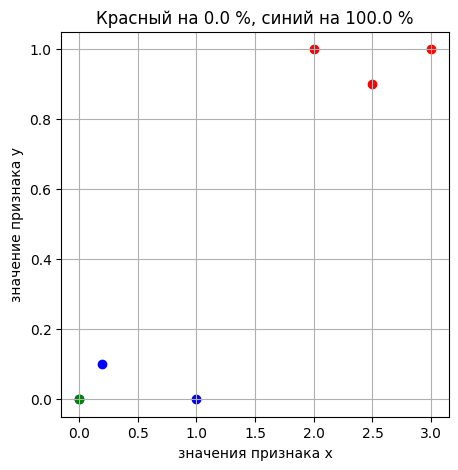

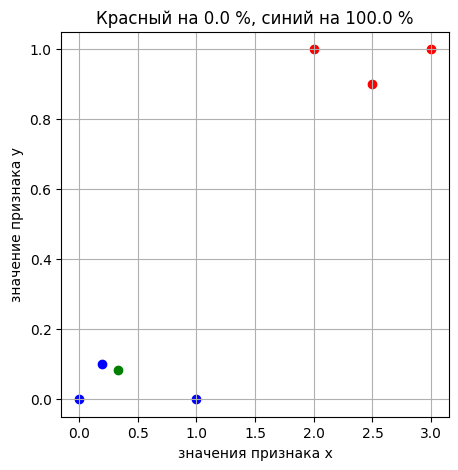

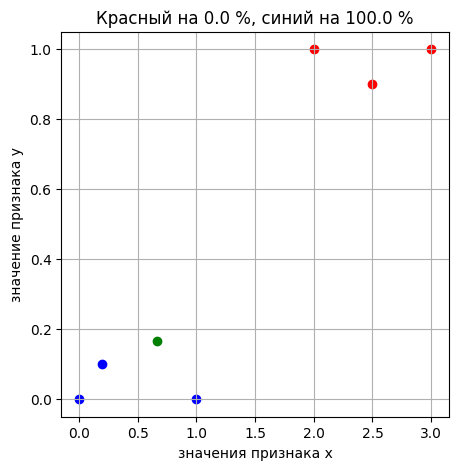

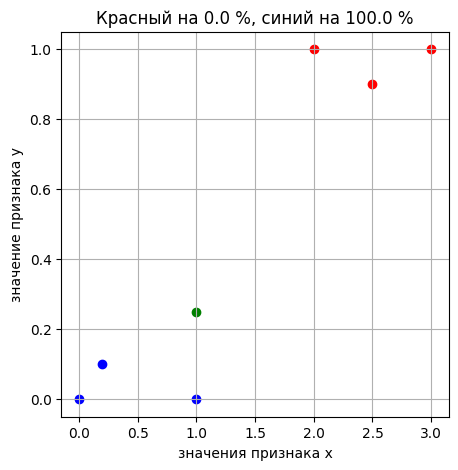

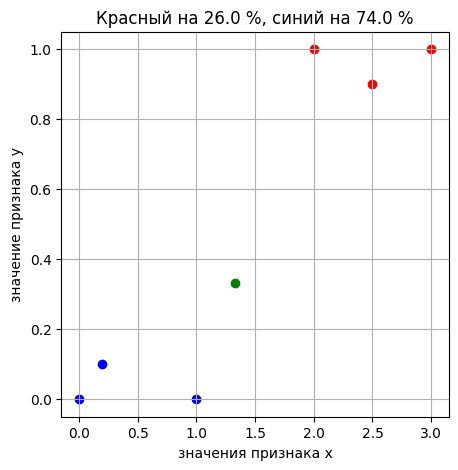

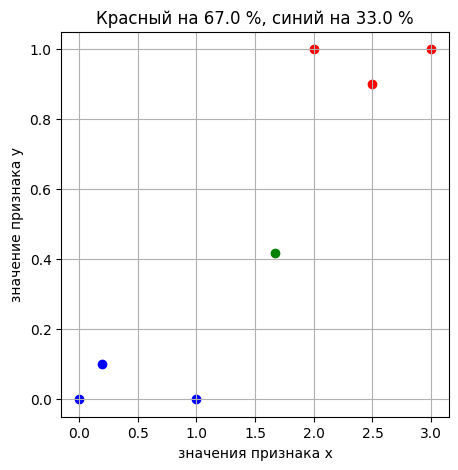

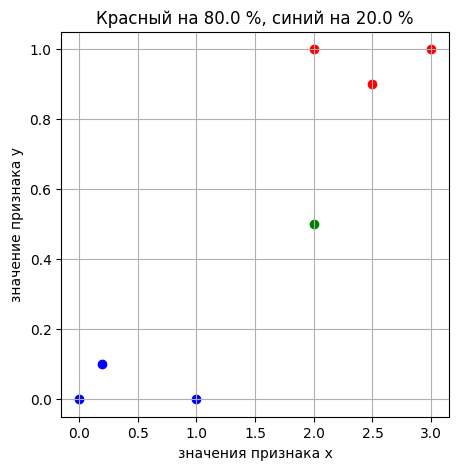

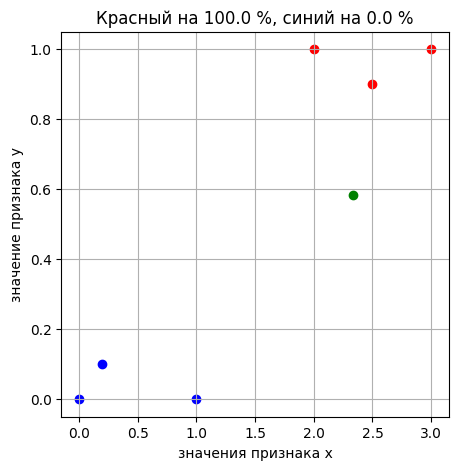

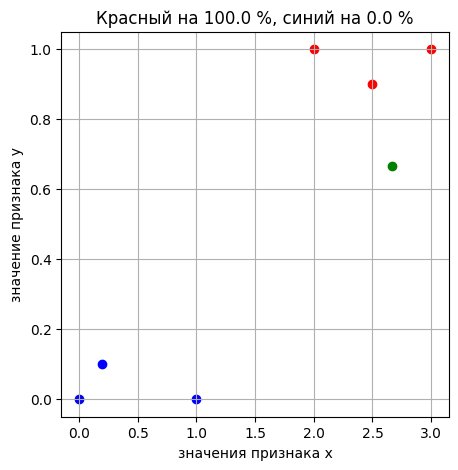

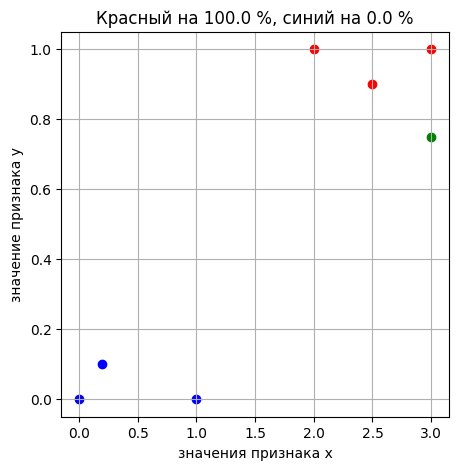

In [8]:
plot_neighbors()

### Задание 7.1
1 point possible (graded)

Какова вероятность принадлежности к нулевому классу объекта для модели 5 ближайших соседей без учёта расстояний до соседей, если в соседях — 4 представителя нулевого класса и 1 — единичного?

In [9]:
4 / 5

0.8

### Задание 7.2
1/1 point (graded)

Какова вероятность принадлежности к нулевому класса объекта для модели 5 ближайших соседей c учётом расстояний до соседей, если в соседях — 3 представителя нулевого класса и 2 — единичного?


* 0.6
* 0.4
* нельзя дать точный ответ - верно

Ответ

Верно: Как мы убедились ранее, с учётом расстояния до соседей вероятность напрямую зависит от расстояния до объектов классов. Без информации о взаимном расположении точек в -мерном пространстве мы даже не можем сказать, какой это будет класс (единичный или нулевой).
